# Exercise 0 (5 points)


This is the notebook for the 0-th exercise. It is meant as a kind of "warm-up" exercise, but it <b>will be graded</b>, and counts towards your total points.


Before you start with this problem:
- Study the corresponding slide deck(s) and consider re-watching the lecture recording(s).
- Internalize the material until you feel confident you can work with them or implement them yourself. Only then start working on this assignment; otherwise, you will waste a lot of time.

---


<div class="alert alert-warning">

**Due-Date:** see Moodle
   
**Constraints**: Operations on SciPy and NumPy arrays only.
  
**Automatic Grading:** 

- Replace the placeholders `# YOUR CODE HERE` `raise NotImplementedError()` / `YOUR ANSWER HERE` with your code / answers.
- make sure to remove all `raise NotImplementedError()` statements
- Put results in the corresponding variable; otherwise, we will not grade your solution (i.e., we assign 0 points).
- Do not delete or add cells.
    
**Submission:** As a ZIP-package via Moodle; the ZIP-package must have the following structure:
    
    + <student ID, (k + 8 digits), e.g. k01234567>.zip
    |
    +-- Assignment_<assignment number>.ipynb
    +
    
**Questions?** Post it into the forum!
</div>

## Running code cells

To execute a code cell, use either `Ctrl-Enter`, `Shift-Enter`, or the GUI buttons above.

Visit our Moodle-page for guidance on how to set up the environment.

In [1]:
# let's import some dependencies first
import numpy as np
import gym
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt

## 1. Expected Values (1 point)
Re-visit the notion of `expected value` for the finite case ([here is a good reminder](https://en.wikipedia.org/wiki/Expected_value)). Then compute the expected value of the given random variable.

In [2]:
def expected_value(xs: np.ndarray, ps: np.ndarray) -> float:
    '''
    Computes the expected value of random variable X with probability p.
    :param xs: Possible outcomes of the variable as a `np.ndarray`.
    :param ps: Probability of outcomes as a `np.ndarray`.
    :returns: The expected value; as a `np.float64`.
    ''' 
    
    # Compute the expected value by taking the dot product of the possible outcomes (xs) and their probabilities (ps)
    # Convert the result to a numpy float64 type for precision.
    e = np.float64(np.dot(xs, ps))

    return e

In [3]:
assert callable(expected_value), "The function `expected_value` must be callable."

# possible outcomes of the variable
xs = np.array([1, 2, 3, 4, 5, 6])

# probabilities of the outcomes
ps = np.ones(len(xs)) / len(xs)

print('xs', xs)
print('ps', ps)

assert expected_value(xs, ps) is not None, "This function must return a float."

print('E[X]', expected_value(xs, ps))

xs [1 2 3 4 5 6]
ps [0.1667 0.1667 0.1667 0.1667 0.1667 0.1667]
E[X] 3.5


## 2. Simulation (1 point)
Let's simulate a few dice rolls, and compute the average over the sequence of outcomes so far, for each time step. In order to quickly simulate our dice, we will use a **pseudo random number generator**. In order to make our experiments reproducible, we will **seed** our random number generator. We have chosen a truly random number via [this page](https://www.random.org/integers/). (Fun fact: True random numbers are a [rather expensive commodity](https://en.wikipedia.org/wiki/Hardware_random_number_generator))

In [4]:
# a little helper function that records the estimates

def simulate(rng: np.random._generator.Generator, n_samples: int) -> np.ndarray:
    '''
    Computes the average over the sequence of outcomes so far, for each time step.
    :param rng: pseudo random number generator as `np.random._generator.Generator`
    :param n_samples: The number of random samples as `int`.
    :returns: The mean over the sequence for each time step; as a `np.ndarray`.
    ''' 
    dice_rolls = rng.integers(
        low=1,   # lower bound
        high=7,  # higher bound (EXCLUSIVE!)
        size=n_samples  # the shape of the resulting numpy array
    )
    estimates = np.zeros(n_samples)
    for t in range(1, n_samples):
        
        # Compute the estimated value of dice_rolls
        # The t means inclused all the previos t-1 values
        estimates[t] = np.mean(dice_rolls[:t])
        
    return estimates

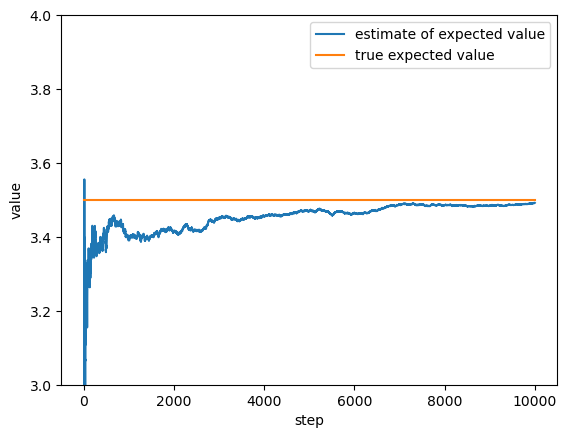

In [5]:
# let's seed our PRNG
rng = np.random.default_rng(7226801)

# let's simulate!
estimates = simulate(rng, 10000)
fig, ax = plt.subplots()
ax.plot(estimates, label='estimate of expected value')

# let's indicate where the true expected value lies
ax.plot(
    [0, len(estimates)],
    [3.5, 3.5],
    label='true expected value'
)

# always label your axes!
ax.set_xlabel('step')
ax.set_ylabel('value')

# let's zoom in on the y-axis
ax.set_ylim([3, 4])
ax.legend()
plt.show()

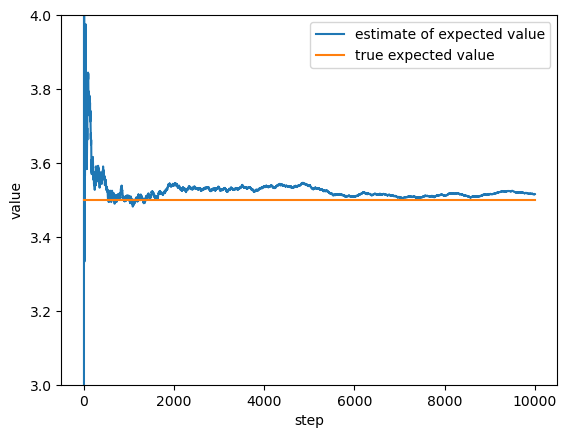

In [6]:
# if we change the PRNG seed, we get different estimates
# let's seed our PRNG
rng = np.random.default_rng(1234)

# let's simulate!
estimates = simulate(rng, 10000)
fig, ax = plt.subplots()
ax.plot(estimates, label='estimate of expected value')

# let's indicate where the true expected value lies
ax.plot(
    [0, len(estimates)],
    [3.5, 3.5],
    label='true expected value'
)

# always label your axes!
ax.set_xlabel('step')
ax.set_ylabel('value')

# let's zoom in on the y-axis
ax.set_ylim([3, 4])
ax.legend()
plt.show()

In [7]:
assert not np.isnan(simulate(np.random.default_rng(7226801), 100)).any()

## 3. Computing Returns (1 point)
Later on in this course, when we will do **value estimation** for our reinforcement learning agents, we will need to compute **returns**. Given a particular **path through state space** of length $T$ ($s_1, r_1, a_2, s_2, r_2, a_3, \dots, a_T, s_T, r_T$), there is a **sequence of rewards** ($r_1, r_2, r_3, \dots, r_T$) associated with it. Together with the so called **discount factor**  or **discount rate** $\gamma$, this sequence of rewards will allow us to compute the **return**.

Given a sequence of rewards: ($r_1, r_2, r_3, \dots, r_T$) and $\gamma = 0.9$

Find **all the returns** as defined: $G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \dots = \sum_{k=0}^{T-t-1} \gamma^k r_{t+k+1}$

What this means is that you should find the returns $G_1, G_2, G_3, \dots, G_T$

In [8]:
def discounted_return_naive(rewards: np.ndarray, gamma: float) -> np.ndarray:
    '''
    Computes all returns for the given sequence of rewards.
    :param rewards: The sequence of rewards as a np.ndarray.
    :param gamma: The discount factor as a `float`.
    :returns: The discounted return for each time step; as a `np.ndarray`.
    ''' 

    # Get number of timesteps
    T = len(rewards)

    #Initialize the returns array
    returns = np.zeros(T)
    # first, we'll implement the return computation just as stated in the above definition
    for t in range(T):
        for k in range(0, T - t - 1):

            # Add the discounted reward to the return for the current timestep t
            # Multiplying the reward at timestep (t+k+1) by the discount factor raised to the k-th power
            returns[t] += pow(gamma,k)*rewards[t+k+1]
            
    return returns

In [9]:
assert np.isclose(np.array([1.0, 0]), discounted_return_naive(np.array([0, 1]), 0.9)).all()# , "`discounted_return` is not implemented or wrong."

## 4. More Efficient Return Computation (1 point)
After staring at the return definition $G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots$ for a while, we might notice a particular recursive pattern.

As it turns out, this pattern, this recursive relationship among returns, is very helpful:

$G_t = r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \gamma^3 r_{t+4} + \dots$

$G_t = r_{t+1} + \gamma (r_{t+2} + \gamma r_{t+3} + \gamma^2 r_{t+4} + \dots)$

$G_t = r_{t+1} + \gamma G_{t+1}$

This works for all time steps $t < T$, if we choose to define $G_T = 0$. Given a sequence of rewards, we can then compute all the returns in the reverse order, without having to compute many intermediate results multiple times! This might be a bit tricky to do, given the array indices in numpy start with $0$, but we're confident you'll manage!


Hint: Make $t$ go downwards from $T - 1$ to $1$, and notice that $G_{t-1} = r_t + \gamma G_t$

In [10]:
def discounted_return(rewards: np.ndarray, gamma: float) -> np.ndarray:
    '''
    Computes all returns for the given sequence of rewards.
    :param rewards: The sequence of rewards as a np.ndarray.
    :param gamma: The discount factor as a `float`.
    :returns: The discounted return for each time step; as a `np.ndarray`.
    ''' 
    T = len(rewards)
    returns = np.zeros(T)
    
    # Initialize G_T = 0 
    G_next = 0

    for t in range (T-2, -1, -1):

        # Compute the return for timestep t using the formula: G_t = r_(t+1) + gamma * G_(t+1)
        # G_next stores the value of G_(t+1) from the previous iteration. At first iteration G_next = 0
        returns[t] = rewards[t+1] + gamma * G_next

        # Update G_next for the next iteration
        G_next = returns[t]

    return returns

In [11]:
assert np.isclose(np.array([1.0, 0]), discounted_return(np.array([0, 1]), 0.9)).all()# , "`discounted_return` is not implemented."

## 5. OpenAI Gym (1 point)
We will use the [OpenAI Gym](https://gym.openai.com) library extensively in our exercises. We will explore the interface to gym-environments , in particular we'll look at one of the [toy_text](https://gym.openai.com/envs/#toy_text) environments. You don't need to write any code here, just observe what is happening after the agent selects an action, and the environment reacts.

**Question**: Is the environment deterministic or stochastic?

In [12]:
deterministic = False # store True or False and remove the `raise NotImplementedError()` statement
# YOUR CODE HERE
# raise NotImplementedError()

In [13]:
assert deterministic in [True, False], "The answer should be in [True, False]"

In [14]:
import gym
# this creates an environment
env = gym.make('FrozenLake-v1')
state = env.reset()

# this shows us a human readable representation of the frozen lake
# S: starting point, safe
# F: frozen surface, potentially slippery, but safe
# H: hole, fall to your doom
# G: goal
# the red square is the agent's position in the world
env.render()


SFFF
FHFH
FFFH
HFFG


In [15]:
# these are the available actions
n2i = dict(
    LEFT = 0,
    DOWN = 1,
    RIGHT = 2,
    UP = 3,
)
i2n = {v:k for k, v in n2i.items()}

# the number of times we'll "live. die. repeat"
n_episodes = 10

for i_episode in range(n_episodes):
    print(f'### e:{i_episode} #########################################')
    # at the start of an episode, we reset the environment
    state = env.reset()

    # then we will call 'step' in a loop, and move randomly until we either:
    # - reach the goal
    # - or fall into a hole

    done = False
    while not done:
        random_action = rng.integers(0, 4)
        print('action:', i2n[random_action])
        state, reward, done, info = env.step(random_action)
        print('state:', state)
        print('reward:', reward)
        # print('done', done)
        # print('info', info)  # we will ignore what's in here!
        env.render()  # this will also display the last action that led to this state
    print('# episode is done')

### e:0 #########################################
action: UP
state: 0
reward: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
action: UP
state: 0
reward: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
action: DOWN
state: 0
reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 0
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 0
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: DOWN
state: 1
reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 1
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 2
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: RIGHT
state: 3
reward: 0.0
  (Right)
SFFF
FHFH
FFFH
HFFG
action: DOWN
state: 7
reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
# episode is done
### e:1 #########################################
action: UP
state: 0
reward: 0.0
  (Up)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 0
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
action: DOWN
state: 1
reward: 0.0
  (Down)
SFFF
FHFH
FFFH
HFFG
action: LEFT
state: 5
reward: 0.0
  (Left)
SFFF
FHFH
FFFH
HFFG
# epis